In [3]:
getwd()

[1] "d:/workspace/R_practice/data/R_data"

In [2]:
setwd('d:/workspace/R_practice/data/R_data')

In [9]:
require(arules)
library('arulesViz')

In [13]:
data(package = 'arules')
data(Groceries)

In [14]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [15]:
inspect(Groceries[1:10])

     items                     
[1]  {citrus fruit,            
      semi-finished bread,     
      margarine,               
      ready soups}             
[2]  {tropical fruit,          
      yogurt,                  
      coffee}                  
[3]  {whole milk}              
[4]  {pip fruit,               
      yogurt,                  
      cream cheese ,           
      meat spreads}            
[5]  {other vegetables,        
      whole milk,              
      condensed milk,          
      long life bakery product}
[6]  {whole milk,              
      butter,                  
      yogurt,                  
      rice,                    
      abrasive cleaner}        
[7]  {rolls/buns}              
[8]  {other vegetables,        
      UHT-milk,                
      rolls/buns,              
      bottled beer,            
      liquor (appetizer)}      
[9]  {pot plants}              
[10] {whole milk,              
      cereals}                 


In [16]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [19]:
head(sort(itemFrequency(Groceries, type = 'absolute'),decreasing = T), 10)

whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt    bottled water  root vegetables   tropical fruit 
            1372             1087             1072             1032 
   shopping bags          sausage 
             969              924

In [21]:
# relative = 상대도수(확률)
head(sort(itemFrequency(Groceries, type = 'relative'),decreasing = T), 10)

whole milk other vegetables       rolls/buns             soda 
      0.25551601       0.19349263       0.18393493       0.17437722 
          yogurt    bottled water  root vegetables   tropical fruit 
      0.13950178       0.11052364       0.10899847       0.10493137 
   shopping bags          sausage 
      0.09852567       0.09395018

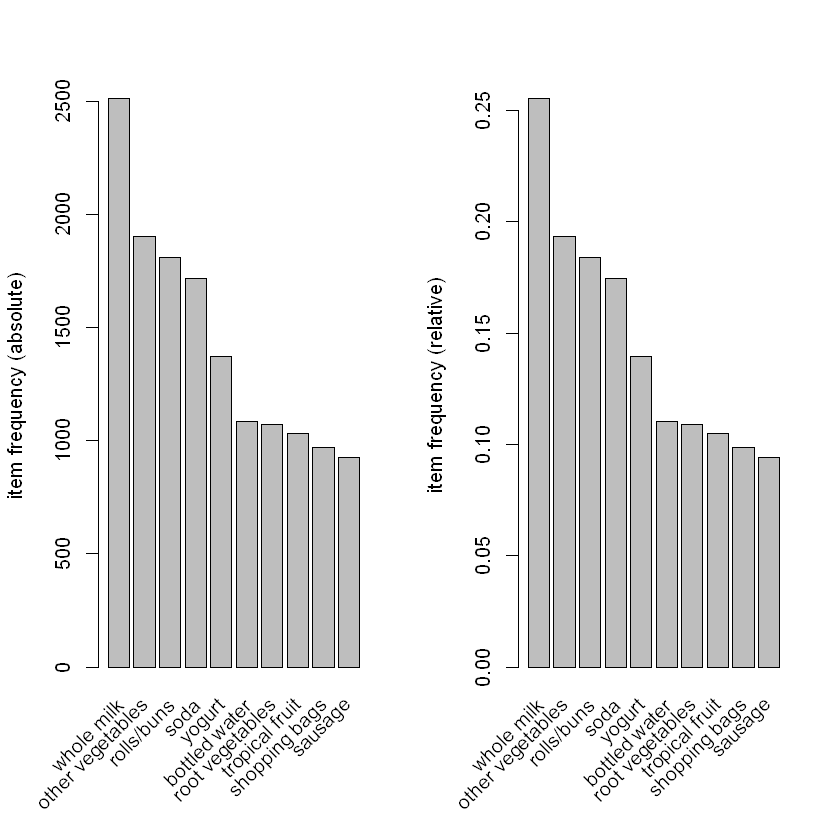

In [23]:
par(mfrow = c(1,2))
itemFrequencyPlot(Groceries, topN = 10, type = 'absolute')
itemFrequencyPlot(Groceries, topN = 10, type = 'relative')

In [24]:
apriori(Groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

In [27]:
result_rules = apriori(Groceries, parameter = list(support = 0.005, confidence = 0.5, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.005      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [120 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [120 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [28]:
summary(result_rules)

set of 120 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 1 98 21 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.167   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005084   Min.   :0.5000   Min.   :0.008134   Min.   :1.957  
 1st Qu.:0.005669   1st Qu.:0.5181   1st Qu.:0.010142   1st Qu.:2.091  
 Median :0.006202   Median :0.5445   Median :0.011490   Median :2.249  
 Mean   :0.007344   Mean   :0.5537   Mean   :0.013404   Mean   :2.379  
 3rd Qu.:0.007982   3rd Qu.:0.5762   3rd Qu.:0.014667   3rd Qu.:2.643  
 Max.   :0.022267   Max.   :0.7000   Max.   :0.043416   Max.   :3.691  
     count       
 Min.   : 50.00  
 1st Qu.: 55.75  
 Median : 61.00  
 Mean   : 72.22  
 3rd Qu.: 78.50  
 Max.   :219.00  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.005        0.5

In [30]:
rules_lift = sort(result_rules, by = 'lift', decreasing = T)
inspect(rules_lift[1:5])

    lhs                     rhs                    support confidence    coverage     lift count
[1] {tropical fruit,                                                                            
     curd}               => {yogurt}           0.005287239  0.5148515 0.010269446 3.690645    52
[2] {citrus fruit,                                                                              
     root vegetables,                                                                           
     whole milk}         => {other vegetables} 0.005795628  0.6333333 0.009150991 3.273165    57
[3] {pip fruit,                                                                                 
     root vegetables,                                                                           
     whole milk}         => {other vegetables} 0.005490595  0.6136364 0.008947636 3.171368    54
[4] {pip fruit,                                                                                 
     whipped/sour cream} => {o

In [31]:
rules_confidence = sort(result_rules, by = 'confidence', decreasing = T)
inspect(rules_confidence[1:5])

    lhs                     rhs              support confidence    coverage     lift count
[1] {tropical fruit,                                                                      
     root vegetables,                                                                     
     yogurt}             => {whole milk} 0.005693950  0.7000000 0.008134215 2.739554    56
[2] {pip fruit,                                                                           
     root vegetables,                                                                     
     other vegetables}   => {whole milk} 0.005490595  0.6750000 0.008134215 2.641713    54
[3] {butter,                                                                              
     whipped/sour cream} => {whole milk} 0.006710727  0.6600000 0.010167768 2.583008    66
[4] {pip fruit,                                                                           
     whipped/sour cream} => {whole milk} 0.005998983  0.6483516 0.009252669 2.537421    59

In [33]:
milk_rule = subset(rules_lift, items %in% 'whole milk')
milk_rule

set of 94 rules 

In [34]:
inspect(milk_rule[1:5])

    lhs                     rhs                    support confidence    coverage     lift count
[1] {citrus fruit,                                                                              
     root vegetables,                                                                           
     whole milk}         => {other vegetables} 0.005795628  0.6333333 0.009150991 3.273165    57
[2] {pip fruit,                                                                                 
     root vegetables,                                                                           
     whole milk}         => {other vegetables} 0.005490595  0.6136364 0.008947636 3.171368    54
[3] {tropical fruit,                                                                            
     root vegetables,                                                                           
     whole milk}         => {other vegetables} 0.007015760  0.5847458 0.011997966 3.022057    69
[4] {root vegetables,         

In [35]:
rhs.milk_rule = subset(rules_lift, rhs %in% 'whole milk')
rhs.milk_rule

set of 84 rules 

In [37]:
inspect(rhs.milk_rule[1:5])

    lhs                     rhs              support confidence    coverage     lift count
[1] {tropical fruit,                                                                      
     root vegetables,                                                                     
     yogurt}             => {whole milk} 0.005693950  0.7000000 0.008134215 2.739554    56
[2] {pip fruit,                                                                           
     root vegetables,                                                                     
     other vegetables}   => {whole milk} 0.005490595  0.6750000 0.008134215 2.641713    54
[3] {butter,                                                                              
     whipped/sour cream} => {whole milk} 0.006710727  0.6600000 0.010167768 2.583008    66
[4] {pip fruit,                                                                           
     whipped/sour cream} => {whole milk} 0.005998983  0.6483516 0.009252669 2.537421    59

In [38]:
wholemilk_rule = apriori(Groceries, parameter = list(support = 0.005, confidence = 0.5,
                                                     minlen = 2), appearance = list(default = 'lhs', rhs = 'whole milk'))
wholemilk_rule = sort(wholemilk_rule, by = 'lift', decreasing = T)
inspect(wholemilk_rule[1:5])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.005      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [120 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [84 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                     rhs              support confidence    coverage     lift count
[1] {tropical fruit,                                                                      
     root vegetables,                                                                     
     yogurt} 

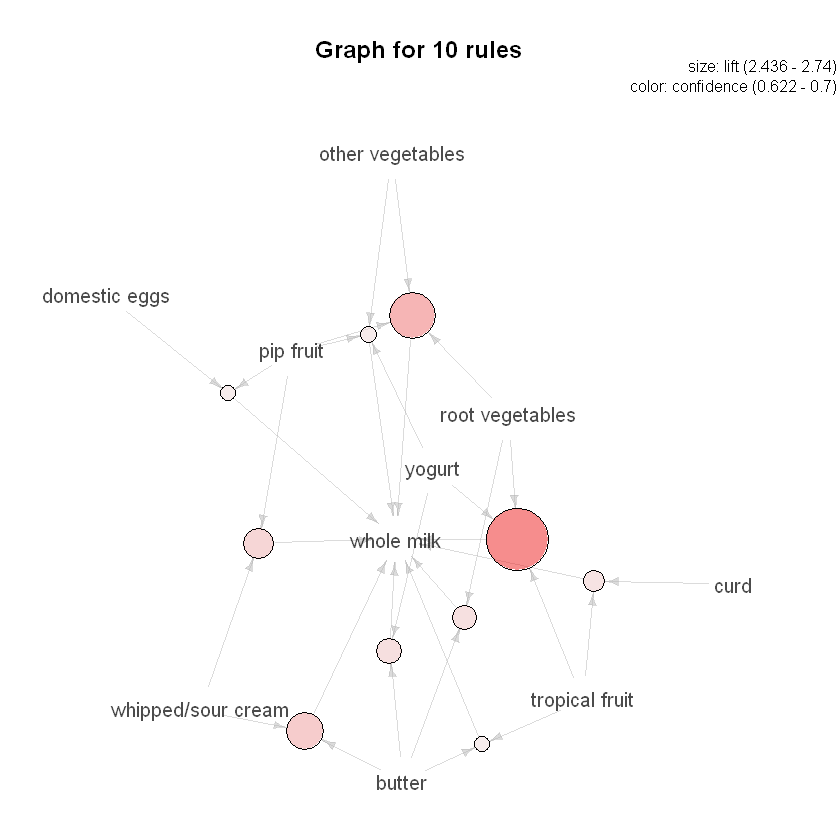

In [39]:
plot(wholemilk_rule[1:10], method = 'graph', measure = 'lift', shading = 'confidence')